In [3]:
#Imports
import os
import numpy as np
import pandas as pd
import json
from pprint import pprint

In [4]:
base_dir = "TestResults/FullResultOnlyTextNew/"

tests = []

for f in os.listdir(base_dir):
    with open(base_dir+f, 'r') as file:
        tests.append(json.loads(file.read()))

In [5]:
df = pd.DataFrame.from_dict(tests)

In [6]:
print(df.sort_values('f1', ascending=False)[:10])

     keylist_id        f1            labels  \
523          37  0.650726  [13+, 7-8, 9-12]   
453          37  0.635622  [13+, 7-8, 9-12]   
440          61  0.635211  [13+, 7-8, 9-12]   
363          61  0.630919  [13+, 7-8, 9-12]   
176          41  0.624378  [13+, 7-8, 9-12]   
198          13  0.624005  [13+, 7-8, 9-12]   
236          13  0.617249  [13+, 7-8, 9-12]   
410          69  0.613953  [13+, 7-8, 9-12]   
228          67  0.613844  [13+, 7-8, 9-12]   
424          37  0.611146  [13+, 7-8, 9-12]   

                                           conf_matrix         c  \
523    [[376, 36, 170], [30, 177, 34], [121, 77, 311]]  0.890222   
453    [[463, 65, 251], [44, 232, 47], [156, 91, 430]]  0.680727   
440  [[1088, 38, 82], [58, 204, 134], [345, 102, 402]]  0.153713   
363    [[820, 29, 55], [41, 148, 107], [240, 92, 303]]  0.243256   
176     [[241, 29, 79], [46, 156, 37], [55, 117, 215]]  0.877203   
198     [[618, 9, 120], [69, 187, 64], [224, 76, 237]]  0.479342   
236  [

/tmp/ipykernel_180381/3622937336.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.lineplot(tt).set_xticklabels(df.sort_values('f1', ascending=False)['keylist_id'].to_numpy())


[Text(-20.0, 0, '37'),
 Text(0.0, 0, '37'),
 Text(20.0, 0, '61'),
 Text(40.0, 0, '61'),
 Text(60.0, 0, '41'),
 Text(80.0, 0, '13'),
 Text(100.0, 0, '13'),
 Text(120.0, 0, '69')]

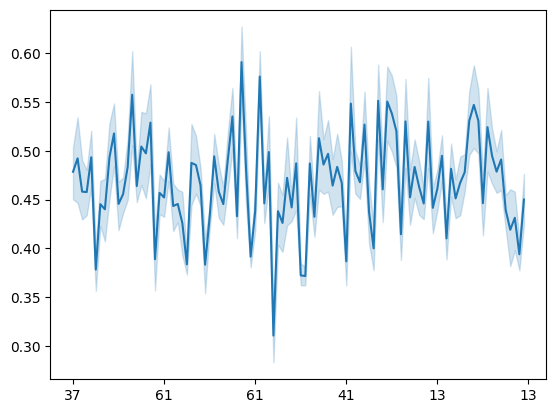

In [7]:
import seaborn as sns
tt = pd.Series(data=df.sort_values('f1', ascending=False)['f1'].to_numpy(), index=df.sort_values('f1', ascending=False)['keylist_id'].to_numpy())
sns.lineplot(tt).set_xticklabels(df.sort_values('f1', ascending=False)['keylist_id'].to_numpy())

### Best for three groups

In [8]:
df = df[df['labels'].apply(lambda x: len(x)==4)]

In [9]:
print(df.sort_values('f1', ascending=False))

Empty DataFrame
Columns: [keylist_id, f1, labels, conf_matrix, c, tol, penalty, c_eval_scores]
Index: []


In [10]:
worst_predicts = np.array(df.sort_values('f1')[:1]['conf_matrix'].to_numpy()[0])
worst_labels = df.sort_values('f1')[:1]['labels'].to_numpy()[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
best_predicts = np.array(df.sort_values('f1', ascending=False)[:1]['conf_matrix'].to_numpy()[0])
best_labels = df.sort_values('f1', ascending=False)[:1]['labels'].to_numpy()[0]

In [ ]:
from sklearn import metrics
p = metrics.ConfusionMatrixDisplay(confusion_matrix=worst_predicts, display_labels=worst_labels)

In [ ]:
#p.plot()

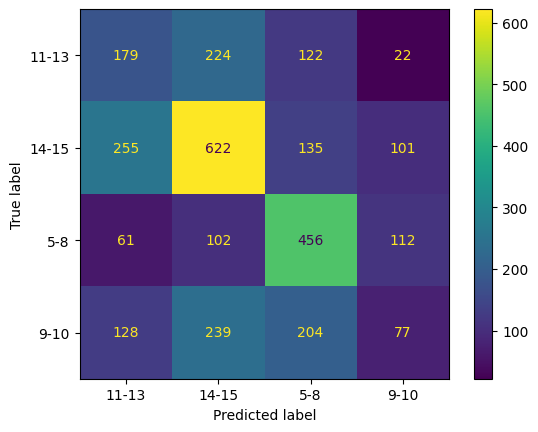

In [ ]:
p = metrics.ConfusionMatrixDisplay(confusion_matrix=best_predicts, display_labels=best_labels)
p.plot()